In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This notebook will be for analyzing goalie stats over the years.

In [2]:
data = pd.read_csv('game_goalie_stats.csv')
data.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,NaN,75.000000,33.333333,84.615385
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889


In [3]:
# We will add a year column, which is obtained from the first four digits of the game_id.

data['year'] = data['game_id'].apply(str).str.slice(stop=4).apply(int)
data.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,year
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,NaN,75.000000,33.333333,84.615385,2016
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,81.818182,100.000000,80.000000,2016
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,85.185185,50.000000,91.304348,2016
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,90.909091,50.000000,96.428571,2017
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,87.878788,80.000000,88.888889,2017


In [4]:
# One thing to note above is the save percentages are not needed since we have the number of shots and saves,
# so we will remove the three columns dealing with save percentage.

data_no_sv_pct = data.drop(['savePercentage', 'powerPlaySavePercentage', 'evenStrengthSavePercentage'], axis=1)

data_no_sv_pct.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,year
0,2016020045,8473607,4,1504,0,0,0,16,12,1,0,11,0,13,3,NaN,2016
1,2016020045,8473461,4,2011,0,0,0,11,9,1,0,8,0,10,1,L,2016
2,2016020045,8470645,16,3598,0,0,0,27,23,2,0,21,0,23,4,W,2016
3,2017020812,8468011,24,3696,0,0,0,33,30,1,2,27,3,28,2,W,2017
4,2017020812,8475215,7,3539,0,0,0,33,29,4,1,24,1,27,5,L,2017


In [5]:
data_no_sv_pct['game_id'].apply(str).str[5].unique() # The 4's are all star games. Need to remove.

array(['2', '3', '4'], dtype=object)

In [6]:
indices_to_remove = []

for i in range(len(data)):
    if str(data_no_sv_pct['game_id'][i])[5] == '4':
        indices_to_remove.append(i)
        
# Remove the indices

data_reg_playoff_only = data_no_sv_pct.drop(indices_to_remove, axis=0)

In [7]:
# Drop any duplicates as the rows should be unique.

data_no_dupes = data_reg_playoff_only.drop_duplicates()

data_no_dupes = data_no_dupes.reset_index() # reset index for ease of use

data_no_dupes = data_no_dupes.drop('index', axis=1)

data_no_dupes.shape

(51143, 17)

In [8]:
# search of any null values

data_no_dupes.isnull().sum()

game_id                       0
player_id                     0
team_id                       0
timeOnIce                     0
assists                       0
goals                         0
pim                           0
shots                         0
saves                         0
powerPlaySaves                0
shortHandedSaves              0
evenSaves                     0
shortHandedShotsAgainst       0
evenShotsAgainst              0
powerPlayShotsAgainst         0
decision                   3719
year                          0
dtype: int64

In [9]:
# We will now look for any odd values. 
data_no_dupes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
game_id,51143.0,2.009913e+09,5.797485e+06,2.000020e+09,2.005021e+09,2.010021e+09,2.015021e+09,2.019030e+09
player_id,51143.0,8.467504e+06,7.426737e+03,8.445275e+06,8.462044e+06,8.469608e+06,8.473461e+06,8.480925e+06
team_id,51143.0,1.662769e+01,1.071527e+01,1.000000e+00,8.000000e+00,1.600000e+01,2.400000e+01,5.400000e+01
timeOnIce,51143.0,3.368911e+03,7.347093e+02,0.000000e+00,3.527000e+03,3.598000e+03,3.600000e+03,9.027000e+03
assists,51143.0,2.105860e-02,1.452061e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
goals,51143.0,1.564241e-04,1.250611e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
pim,51143.0,8.955282e-02,6.228769e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01
shots,51143.0,2.752496e+01,8.799113e+00,0.000000e+00,2.300000e+01,2.800000e+01,3.300000e+01,8.800000e+01
saves,51143.0,2.506054e+01,8.622398e+00,0.000000e+00,2.000000e+01,2.600000e+01,3.100000e+01,8.500000e+01
powerPlaySaves,51143.0,4.139120e+00,3.226856e+00,0.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,2.500000e+01


In [10]:
# The only thing that sticks out to me is the shortHandedSaves row since there is a min of -1.

data_no_dupes[data_no_dupes['shortHandedSaves'] < 0]

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,year
14610,2013020073,8466141,23,3600,0,0,0,38,34,3,-1,32,0,33,5,L,2013
45849,2019020092,8475831,21,3837,0,0,0,32,29,5,-1,25,0,27,5,L,2019


In [11]:
# Based on the two above, we see that the numbers add up as far as the number of goals scored.
# However, we do not know what is causing the error, so we will delete these two rows

indices_to_drop = data_no_dupes[data_no_dupes['shortHandedSaves'] < 0].index.tolist()

data_no_neg_saves = data_no_dupes.drop(indices_to_drop, axis=0)

data_no_neg_saves = data_no_neg_saves.reset_index()

data_no_neg_saves = data_no_neg_saves.drop('index', axis=1)
        

In [12]:
# Remove any rows that have a repeated pair of ('game_id', 'team_id') since this means many goalies played for
# the same team in this game, which is not what we are interested in.
data_single_goalies = data_no_neg_saves[data_no_neg_saves[['game_id', 'team_id']].duplicated(keep=False)==False]

In [13]:
data_single_goalies.groupby(['game_id', 'team_id'])['player_id'].count().unique() # only one goalier per game

array([1], dtype=int64)

In [14]:
data_single_goalies.isnull().sum()

game_id                    0
player_id                  0
team_id                    0
timeOnIce                  0
assists                    0
goals                      0
pim                        0
shots                      0
saves                      0
powerPlaySaves             0
shortHandedSaves           0
evenSaves                  0
shortHandedShotsAgainst    0
evenShotsAgainst           0
powerPlayShotsAgainst      0
decision                   1
year                       0
dtype: int64

In [15]:
# We explore the 1 undecided games

data_single_goalies.loc[data_single_goalies['decision'].isnull() == True]

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,year
35260,2003020027,8458266,20,1363,0,0,0,10,8,1,0,7,0,8,2,NaN,2003


In [16]:
# Since having the decision is vital, we will drop these 1 rows. This is because
# the player's timeOnIce is really low for a goalie that did not play an entire game. There may
# have been an error in the data records for this game since we deleted rows with
# duplicated game/team id's. Possible the other goalie's stats in this game were not counted.
indices_to_drop = data_single_goalies.loc[data_single_goalies['decision'].isnull() == True].index.tolist()

data_clean = data_single_goalies.drop(indices_to_drop, axis=0)

data_clean = data_clean.reset_index()

data_clean = data_clean.drop('index', axis=1)

In [17]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43705 entries, 0 to 43704
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   game_id                  43705 non-null  int64 
 1   player_id                43705 non-null  int64 
 2   team_id                  43705 non-null  int64 
 3   timeOnIce                43705 non-null  int64 
 4   assists                  43705 non-null  int64 
 5   goals                    43705 non-null  int64 
 6   pim                      43705 non-null  int64 
 7   shots                    43705 non-null  int64 
 8   saves                    43705 non-null  int64 
 9   powerPlaySaves           43705 non-null  int64 
 10  shortHandedSaves         43705 non-null  int64 
 11  evenSaves                43705 non-null  int64 
 12  shortHandedShotsAgainst  43705 non-null  int64 
 13  evenShotsAgainst         43705 non-null  int64 
 14  powerPlayShotsAgainst    43705 non-nul

While we deleted the save percentage columns prior, we will reintroduce them in our own way. Prior, 0/0 was undefined, naturally, but it makes sense to have it be 100%, since the goalie letting in zero goals is a good thing. We will add four columns: savePerc, evenSavePerc, powerSavePerc, and shortSavePerc, and fill all nulls with 100.

We will also not have a use for the saves columns afterwards, so we will define a new dataframe without them.

In [18]:
data_clean['savePerc'] = data_clean['saves'] / data_clean['shots'] * 100
data_clean['evenSavePerc'] = data_clean['evenSaves'] / data_clean['evenShotsAgainst'] * 100
data_clean['powerSavePerc'] = data_clean['powerPlaySaves'] / data_clean['powerPlayShotsAgainst'] * 100
data_clean['shortSavePerc'] = data_clean['shortHandedSaves'] / data_clean['shortHandedShotsAgainst'] * 100

data_clean_no_null = data_clean.fillna(value=100) # The only null values were from the new columns, so this is fine.

In [19]:
# We will now drop the "saves" columns along with assists, goals, and pim since these are almost all zeros.
cols_to_drop = ['assists', 'goals', 'pim', 'saves', 'powerPlaySaves', 'evenSaves', 'shortHandedSaves']

data_final_pre_check = data_clean_no_null.drop(cols_to_drop,
                              axis=1)

data_final_pre_check.head()

,game_id,player_id,team_id,timeOnIce,shots,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,year,savePerc,evenSavePerc,powerSavePerc,shortSavePerc
0,2016020045,8470645,16,3598,27,0,23,4,W,2016,85.185185,91.304348,50.0,100.000000
1,2017020812,8468011,24,3696,33,3,28,2,W,2017,90.909091,96.428571,50.0,66.666667
2,2017020812,8475215,7,3539,33,1,27,5,L,2017,87.878788,88.888889,80.0,100.000000
3,2015020314,8473575,21,3600,21,1,17,3,W,2015,95.238095,94.117647,100.0,100.000000
4,2015020314,8474636,52,3520,28,0,23,5,L,2015,89.285714,91.304348,80.0,100.000000


In [20]:
# The last thing to do is make sure there are no errors in how the shots are being tallied up.
# Explicityly shots = shortHandedShotsAgaint + evenShotsAgainst + powerPlayShotsAgainst.

# If they do not match, we will remove those rows as the data cannot be trusted.
indices_to_drop = []

shots = data_final_pre_check['shots']
short_shots = data_final_pre_check['shortHandedShotsAgainst']
even_shots = data_final_pre_check['evenShotsAgainst']
power_shots = data_final_pre_check['powerPlayShotsAgainst']

for i in range(len(data_final_pre_check)):
    if shots[i] != (short_shots[i] + even_shots[i] + power_shots[i]):
        indices_to_drop.append(i)
        
data_final = data_final_pre_check.drop(indices_to_drop, axis=0)

# Ready to analyze.

First thing to do is get some insight into the stats. Since we are ultimately interested in predicting wins and losses, we will compare save percentage stats when won and loss.

In [21]:
wins = data_final[data_final['decision'] == 'W']
losses = data_final[data_final['decision'] == 'L']

save_cols = ['savePerc', 'evenSavePerc', 'powerSavePerc', 'shortSavePerc']

In [22]:
wins.describe()[save_cols].transpose()

,count,mean,std,min,25%,50%,75%,max
savePerc,23144.0,93.863410,4.124258,66.666667,91.304348,94.117647,96.666667,100.0
evenSavePerc,23144.0,94.625939,4.544825,66.666667,92.000000,95.238095,100.000000,100.0
powerSavePerc,23144.0,89.529759,18.407300,0.000000,83.333333,100.000000,100.000000,100.0
shortSavePerc,23144.0,96.890886,15.111354,0.000000,100.000000,100.000000,100.000000,100.0


In [23]:
losses.describe()[save_cols].transpose()

,count,mean,std,min,25%,50%,75%,max
savePerc,20546.0,88.573817,4.852472,54.545455,85.714286,88.888889,92.000000,100.0
evenSavePerc,20546.0,89.590834,5.655996,42.857143,86.363636,90.000000,93.548387,100.0
powerSavePerc,20546.0,82.835482,21.928125,0.000000,75.000000,87.500000,100.000000,100.0
shortSavePerc,20546.0,94.222061,20.218431,0.000000,100.000000,100.000000,100.000000,100.0


In [24]:
# Having a save percentage of 100 with a loss does not necessarily make sense,
# so we will look at these.

losses[losses['savePerc'] == 100]

,game_id,player_id,team_id,timeOnIce,shots,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,year,savePerc,evenSavePerc,powerSavePerc,shortSavePerc
2508,2017020561,8475831,15,3900,37,1,34,2,L,2017,100.0,100.0,100.0,100.0
4318,2016020785,8471219,8,3900,32,0,27,5,L,2016,100.0,100.0,100.0,100.0
6724,2017020965,8479292,8,3900,33,0,32,1,L,2017,100.0,100.0,100.0,100.0
7837,2014020055,8470880,19,3900,18,0,13,5,L,2014,100.0,100.0,100.0,100.0
7954,2014021210,8471715,52,3900,21,2,17,2,L,2014,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37490,2001021157,8448535,15,3900,28,0,25,3,L,2001,100.0,100.0,100.0,100.0
37553,2001020026,8460705,28,3900,19,4,14,1,L,2001,100.0,100.0,100.0,100.0
39149,2019020127,8469608,22,3900,23,0,13,10,L,2019,100.0,100.0,100.0,100.0
40846,2019021041,8475883,10,3900,30,0,26,4,L,2019,100.0,100.0,100.0,100.0


In [25]:
# We see the time on ice seems to be 3900 quite a bit. Let's check even further on this.

losses[losses['savePerc'] == 100]['timeOnIce'].unique()

# All these time on ice represent a number very close to 3900. This is the amount of time a game that goes
# into a shootout lasts. From this, we can conclude these games were most likely 0-0 at the end of overtime,
# and since goals don't count against goalies in the shootout, their losses are true 0-0 losses.

array([3900, 3887, 3888, 3899, 3897, 3871, 3894, 3889, 3898], dtype=int64)

In looking at the data descriptionabove, the first thing I notice is the rather large difference in the means of the data, but two thing I notice in particular is the following:

The power save % in wins has a mean very similar to even save % in losses, and the even save % in wins has a very similar mean to the short-handed save % in losses.

For those unfamiliar, on a powerplay, the opposing team has a man advantage (5 on 4) on the ice, so it is much easier to score. Even strength is 5 on 5 most of the time, but can occasionally be 4 on 4 or 3 on 3. Short-handed is when you are the team with less skaters, usually 4 on 5.

Of course, save percentages do not tell the whole story. While higher is better, a save percentage of 90% on 30 shots means allowing 3 goals, whereas a save percentage of 90% on 40 shots means allowing 4 goals. The goalie has the same performance level as far as save percentage, but shots against are  more of a team statistic than individual for goalie (along with save % to an extent), so predicting wins should involve shots as well.

We will now look at the shot statistics in win vs losses.

In [26]:
shot_cols = ['shots', 'shortHandedShotsAgainst', 'evenShotsAgainst', 'powerPlayShotsAgainst']

wins.describe()[shot_cols].transpose()

,count,mean,std,min,25%,50%,75%,max
shots,23144.0,29.607587,6.935684,9.0,25.0,29.0,34.0,63.0
shortHandedShotsAgainst,23144.0,0.910344,1.137540,0.0,0.0,1.0,1.0,10.0
evenShotsAgainst,23144.0,23.663671,6.423643,4.0,19.0,23.0,28.0,58.0
powerPlayShotsAgainst,23144.0,5.033572,3.395484,0.0,3.0,5.0,7.0,25.0


In [27]:
losses.describe()[shot_cols].transpose()

,count,mean,std,min,25%,50%,75%,max
shots,20546.0,29.765064,6.788459,10.0,25.0,29.0,34.0,88.0
shortHandedShotsAgainst,20546.0,0.919595,1.133511,0.0,0.0,1.0,1.0,15.0
evenShotsAgainst,20546.0,23.655553,6.313939,5.0,19.0,23.0,28.0,79.0
powerPlayShotsAgainst,20546.0,5.189915,3.493254,0.0,3.0,5.0,7.0,28.0


The above shows very similar statistics as far as shots in wins vs losses. All the means and standard deviations are very similar to each other. This would really indicate that shots are not as important in predicting a win or loss compared to the save percentages.

<Figure size 1200x1200 with 0 Axes>

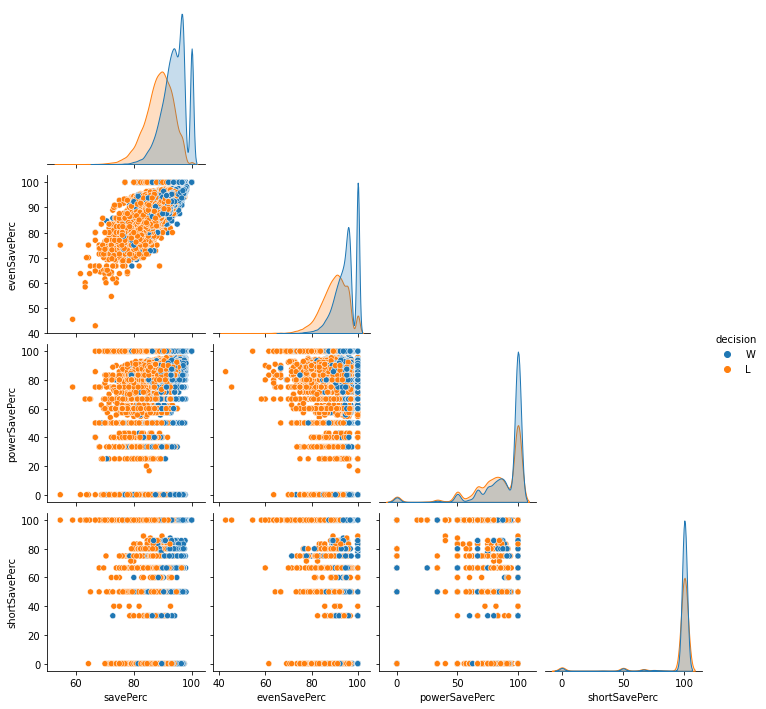

In [28]:
plt.figure(figsize=(12,12), dpi=100)
sns.pairplot(data=data_final[['savePerc', 'evenSavePerc', 'powerSavePerc', 'shortSavePerc', 'decision']], 
             diag_kind='kde',
             hue='decision',
             corner=True)

The above plots show a little more insight into the save distributions. It is rather straightforward that overall save percentage and even save percentage look to be distributed higher for wins than losses, but is less straightforward for powerplay and shorthanded save percentages. This is probably due to there being many more shots at even strength than the others, so it is not an unexpected find.

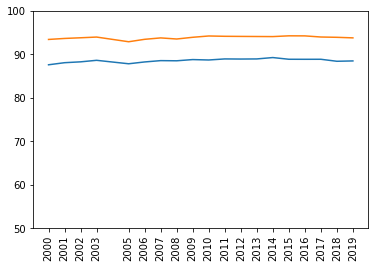

In [29]:
# Out of curiousity, we will see if the save percentages for wins and losses have a change throughout the years.

save_perc_by_year_losses = losses.groupby(['year'])['savePerc'].mean()
save_perc_by_year_wins = wins.groupby(['year'])['savePerc'].mean()

years = save_perc_by_year_losses.index

plt.plot(years, save_perc_by_year_losses)
plt.plot(years, save_perc_by_year_wins)

plt.ylim((50,100))
plt.xticks(years, rotation=90)
plt.show()

# Save percentage for wins and losses stays rather consistent over time. There is a dip from 2003 to 2005.
# Note: 2004 season was not played due to a lockout.

# Model Creation and Machine Learning Classification

I will now make a model to predict the outcome (W or L) based on the features we have available.

In [30]:
X = data_final[['shots','shortHandedShotsAgainst', 'evenShotsAgainst', 
                'powerPlayShotsAgainst','savePerc', 'evenSavePerc', 
                'powerSavePerc', 'shortSavePerc']]
y = data_final['decision']

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, plot_confusion_matrix


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()

# scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
C_values = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.9, 1]

log_model = LogisticRegression()

# logistic regression model with penalty of l2
log_param_grid = {'C': C_values}

log_grid = GridSearchCV(estimator=log_model, param_grid=log_param_grid, cv=5, scoring='accuracy')

log_grid.fit(X_train_scaled, y_train)

# logistic regression model with penalty of l1
log2_param_grid = {'C': C_values,
                   'penalty': ['l1'],
                   'solver': ['liblinear']}

log2_grid = GridSearchCV(estimator=log_model, param_grid=log2_param_grid, cv=5, scoring='accuracy')

log2_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.9, 1],
                         'penalty': ['l1'], 'solver': ['liblinear']},
             scoring='accuracy')

In [34]:
log_grid.best_estimator_.get_params()

{'C': 0.9,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
log_grid.cv_results_['mean_test_score']

array([0.72734684, 0.73411172, 0.735663  , 0.73599362, 0.73601905,
       0.73601905, 0.73601905])

In [36]:
log2_grid.best_estimator_.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
log2_grid.cv_results_['mean_test_score']

array([0.47137662, 0.73311982, 0.73612077, 0.73604448, 0.73604449,
       0.73604449, 0.73601905])

In [38]:
log_preds = log_grid.predict(X_test_scaled)

print(classification_report(y_test, log_preds)) #l2

              precision    recall  f1-score   support

           L       0.71      0.72      0.71      2011
           W       0.76      0.75      0.75      2358

    accuracy                           0.73      4369
   macro avg       0.73      0.73      0.73      4369
weighted avg       0.73      0.73      0.73      4369



In [39]:
log2_preds = log2_grid.predict(X_test_scaled)

print(classification_report(y_test, log2_preds)) #l1

              precision    recall  f1-score   support

           L       0.71      0.72      0.71      2011
           W       0.76      0.74      0.75      2358

    accuracy                           0.73      4369
   macro avg       0.73      0.73      0.73      4369
weighted avg       0.73      0.73      0.73      4369



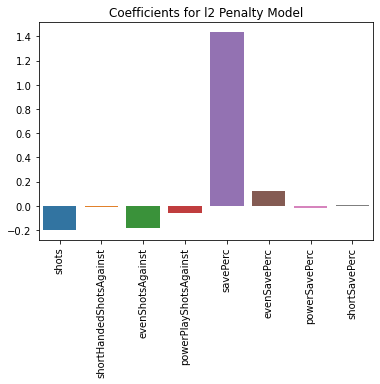

In [41]:
coefs = pd.Series(index=X.columns,data=log_grid.best_estimator_.coef_[0])

sns.barplot(x=coefs.index, y=coefs.values)

plt.xticks(rotation=90)
plt.title('Coefficients for l2 Penalty Model')
plt.show()

The coefficients of our model really show what we saw in our analysis, in that
save percentage (and even save percentage) are more indicative of winning or losing
than powerplay and shorthanded save percentages.

We also see that all shots categories have negative coefficients, but are relatively
small compared to savePerc.

If we implement an L1 regularization (error), we may see some of the coefficients go to zero.

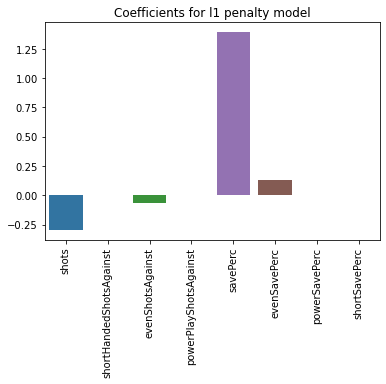

In [42]:
coefs2 = pd.Series(index=X.columns, data=log2_grid.best_estimator_.coef_[0])

sns.barplot(x=coefs2.index, y=coefs2.values)

plt.xticks(rotation=90)
plt.title('Coefficients for l1 penalty model')
plt.show()

# the L1 regularization penalty shows that only 4 features have importance in this model:
# shots, evenShotsAgainst, savePerc, and evenSavePerc.


Ultimately, we would not expect much improvement on this level of accuracy with many different models due to a lack of separation in the data. There are many wins with worse goalie stats than losses due to other elements at play during the game. However, as we saw during the last model's results, over the course of many games, special teams play may not be as important to winning as previously thought. To see this, let's recall statistics about power play shots against and the corresponding save percentages

In [43]:
data_final.describe()[['powerPlayShotsAgainst', 'powerSavePerc']].transpose()

,count,mean,std,min,25%,50%,75%,max
powerPlayShotsAgainst,43690.0,5.107095,3.442653,0.0,3.0,5.0,7.0,28.0
powerSavePerc,43690.0,86.381656,20.414891,0.0,80.0,100.0,100.0,100.0


In [44]:
wins.describe()[['powerPlayShotsAgainst', 'powerSavePerc']].transpose()

,count,mean,std,min,25%,50%,75%,max
powerPlayShotsAgainst,23144.0,5.033572,3.395484,0.0,3.000000,5.0,7.0,25.0
powerSavePerc,23144.0,89.529759,18.407300,0.0,83.333333,100.0,100.0,100.0


In [45]:
losses.describe()[['powerPlayShotsAgainst', 'powerSavePerc']].transpose()

,count,mean,std,min,25%,50%,75%,max
powerPlayShotsAgainst,20546.0,5.189915,3.493254,0.0,3.0,5.0,7.0,28.0
powerSavePerc,20546.0,82.835482,21.928125,0.0,75.0,87.5,100.0,100.0


In viewing the data above, while we can see clear differences in the means between the power play save percentage in each of the overall, wins, and losses data, we can calculate to see that the expect difference in power play goals for game in wins vs losses is not very drastic.

In [46]:
print("Expected Number of Power Play Goals Allowed in a Win: " +
      str((100 - wins['powerSavePerc'].mean()) * wins['powerPlayShotsAgainst'].mean() / 100))

print("Expected Number of Power Play Goals Allowed in a Loss: " +
      str((100 - losses['powerSavePerc'].mean()) * losses['powerPlayShotsAgainst'].mean() / 100))

# While the below is a rather large relative difference, in an individual game, since goals can
# only take on whole number values, this difference is not very large.

Expected Number of Power Play Goals Allowed in a Win: 0.5270271620157618
Expected Number of Power Play Goals Allowed in a Loss: 0.8908239696722758


In [47]:
print("Expected Number of Even Strength Goals Allowed in a Win: " +
      str((100 - wins['evenSavePerc'].mean()) * wins['evenShotsAgainst'].mean() / 100))

print("Expected Number of Even Strength Goals Allowed in a Loss: " +
      str((100 - losses['evenSavePerc'].mean()) * losses['evenShotsAgainst'].mean() / 100))

# A much larger difference for even strength.

Expected Number of Even Strength Goals Allowed in a Win: 1.2717000194805308
Expected Number of Even Strength Goals Allowed in a Loss: 2.4623459260569622


In [48]:
print("Expected Number of Goals Allowed by Goalie in a Win: " +
      str((100 - wins['savePerc'].mean()) * wins['shots'].mean() / 100))

print("Expected Number of Goals Allowed by Goalie in a Loss: " +
      str((100 - losses['savePerc'].mean()) * losses['shots'].mean() / 100))

Expected Number of Goals Allowed by Goalie in a Win: 1.8168961598643596
Expected Number of Goals Allowed by Goalie in a Loss: 3.4010106100601623


In [49]:
print("Average Number of Goals Allowed Per Game: " + 
       str((100- data_final['savePerc'].mean()) * data_final['shots'].mean() / 100))

Average Number of Goals Allowed Per Game: 2.5597790680816437


Overall, we can see from our logistic models coefficient, along with the analysis performed, that a goalie's stats during even strength is far more vital than power play stats. This does make some level of sense because most of the game time is spent even strength.

Of particular interest to me is the expected number of goals allowed by the goalie in a win vs a loss. Since we took out games that involved multiple goalies for one team, these games would be closer on average. Further, these stats would not count for empty next goals scored, which causes a larger disparity in the final score many times. Still, while the difference necessarily needs to be > 1, it is ~1.6 which is closer to 2 than one; a very interesting find.